In [155]:
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
import cv2
from PIL import Image


In [13]:
from keras.datasets import mnist

In [14]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [15]:
train_X.shape

(60000, 28, 28)

In [29]:
def show_img(img):
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()

In [23]:
train_X[0].shape

(28, 28)

In [24]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
train_X_0 = train_X[train_y==0,:]

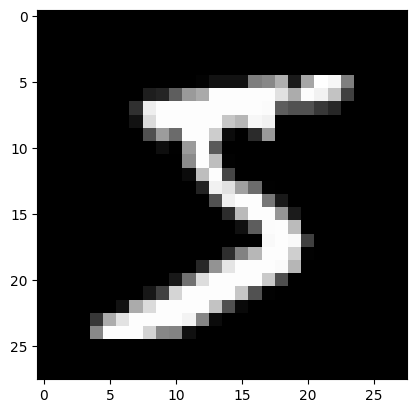

In [124]:
show_img(train_X[0])

In [31]:
X_centroid = np.mean(train_X_0, axis=0)

In [37]:
len(set(train_y))

10

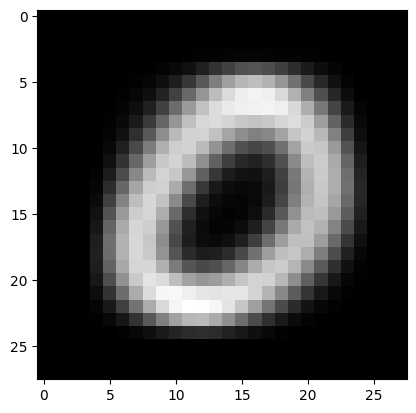

In [32]:
show_img(X_centroid)

In [143]:
def calculate_centroid(train_X, train_y):
    centroids = []
    for i in range(len(set(train_y))):
        data = train_X[train_y==i,:]
        centroid = np.mean(data, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

def distances(x_test, centroids):
    centroids = centroids.reshape(centroids.shape[0], centroids.shape[1]*centroids.shape[2])
    x_test = x_test.reshape(x_test.shape[0]*x_test.shape[1])
    X2 = np.sum(centroids*centroids, 1)
    z2 = np.sum(x_test*x_test)
    D = X2 + z2 - 2*centroids.dot(x_test)
    return np.argmin(D)

def get_labels(test_X, centroids):
    labels = []
    for i in range(test_X.shape[0]):
        labels.append(distances(test_X[i],centroids))
    return np.array(labels)

In [146]:
centroids = calculate_centroid(train_X, train_y)
y_pred = get_labels(test_X, centroids)

In [149]:
accuracy_score(test_y, y_pred)

0.8203

In [57]:
a = np.array([2,4,1,5,6,7,9])

In [58]:
print(np.argmin(a))

2


In [133]:
test_X.shape[0]

10000

In [152]:
imgGray = cv2.imread('IMG_0865.HEIC',0)

In [154]:
imgGray

In [159]:
img = Image.open('IMG_0865.jpg')
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')

In [160]:
image = Image.open('test_gray.jpg')
new_image = image.resize((28, 28))
new_image.save('myimage_28.jpg')

In [166]:
img = cv2.imread('myimage_28.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = 255 - img
cv2.imwrite('output.jpg', gray)

True

In [179]:
img = cv2.imread('output.jpg')

In [180]:
input_img = img[:,:,0]

In [188]:
input_ls = []
input_ls.append(input_img)
input_ls = np.array(input_ls)

In [184]:
input_img.shape[0]

28

In [189]:
get_labels(input_ls, centroids)

array([1])

In [190]:
distances(input_img, centroids)

1

In [195]:
def distances_all(x_test, centroids):
    centroids = centroids.reshape(centroids.shape[0], centroids.shape[1]*centroids.shape[2])
    x_test = x_test.reshape(x_test.shape[0]*x_test.shape[1])
    X2 = np.sum(centroids*centroids, 1)
    z2 = np.sum(x_test*x_test)
    D = X2 + z2 - 2*centroids.dot(x_test)
    return D, np.argmin(D*D)

In [196]:
D, label = distances_all(input_img, centroids)

In [197]:
D*D

array([7.00099728e+11, 5.26185995e+11, 2.55294627e+11, 6.06749834e+10,
       3.97078838e+10, 2.93324701e+11, 5.57959046e+09, 3.46872624e+09,
       1.52115022e+11, 1.24927102e+09])

In [198]:
label

9